In [1]:
###########################################################################
# 4.1 實驗設計
# 半自動標記
# 我們設計的演算法(利用分群的時間序列訓練 Vomm)
###########################################################################

In [2]:
import Data_Engineering
import pandas as pd

Preprocessing   = Data_Engineering.Preprocessing()
Train_Data      = pd.read_csv('Train_DataSet_Rotation_Init_Normalized_Cluster.csv')
Test_Data       = pd.read_csv('Test_DataSet_Rotation_Init_Normalized_Cluster.csv')
Train_Data      = Train_Data[::5]
Test_Data       = Test_Data[::5]

In [3]:
###########################################################################
# 資料集簡介
#
# 檔案名稱      ： Train_Data
# 資料集描述    :(時)2023年4月17日14時16分開始，(地)學校附近，(車人流量)少
# 總資料筆數     : 5516筆
# 取樣頻率      ： 每秒6次
# 動作元素分群  ： 4群
# 標記狀況      : 2820筆   
#
# 檔案名稱      :Test_Data
# 資料集描述    :(時)2023年4月17日14時16分開始，(地)學校附近，(車人流量)少
# 總資料筆數    :5516筆
# 取樣頻率      :每秒6次
# 動作元素分群  :4群
# 標記狀況     : 1578筆    
# 
###########################################################################

In [4]:
# def Train_Vomm(self, TrainData, k):
#     Train the VOMM model with the training data.
#     parameter:
#         - TrainData: Training data, which contains data for different actions and action elements.
#         - k: Number of data groups.
#     output:
#         Returns no value, but creates and saves the trained VOMM model in the object.


Preprocessing.Train_Vomm(Train_Data, 4)

訓練模型所花費時間：0小時0分鐘48秒


In [5]:
# def Test_Vomm(self, TestData, frequency):
#     Test the VOMM model on the test data.
#     parameter:
#         - TestData: Test data, containing the sequence of action elements to test.
#         - frequency: How often the dataset is sampled.
#     output:
#         Returns no value, but saves the prediction to a file.

Preprocessing.Test_Vomm(Test_Data, 6)

預測所花費時間：0小時0分鐘8秒


In [6]:
# def Compute_Accuracy_V2(self, DataSet, frequency):
#     Computes the accuracy of predictions based on the provided dataset and frequency.
#     parameter:
#         self: the object instance.
#         DataSet: A dataset containing action data.
#         Frequency: Dataset sampling frequency.
#     output:
#         return result: DataFrame containing precision results, and save archive to file.


Preprocessing.Compute_Accuracy_V2(Test_Data, 6)

,Time Step,Time Step,Idle,U-turn,Turn Right,Turn Left,Go Straight,Two-Stage Left,Match Percentage
0,Action,Action,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000
1,length_6,length_6,96.130167,33.695652,11.25,5.882353,15.306122,40.776699,75.665399
2,Filter_6,Filter_6,98.944591,42.391304,15.00,0.000000,5.102041,46.601942,77.883397
3,length_12,length_12,82.937555,51.086957,15.00,10.294118,11.224490,39.805825,67.237009
4,Filter_12,Filter_12,94.986807,53.260870,16.25,2.941176,2.040816,45.631068,75.602028
5,length_18,length_18,77.396658,44.565217,11.25,10.294118,3.061224,39.805825,62.167300
6,Filter_18,Filter_18,84.872471,47.826087,15.00,0.000000,0.000000,32.038835,66.793409
7,length_24,length_24,73.175022,32.608696,8.75,11.764706,1.020408,26.213592,57.351077
8,Filter_24,Filter_24,76.693052,34.782609,1.25,0.000000,0.000000,27.184466,59.125475
9,length_30,length_30,70.272647,41.304348,12.50,10.294118,1.020408,31.067961,56.210393


In [7]:
###########################################################################
# 4.1 實驗設計
# 半自動標記
# 使用傳統分類的演算法
###########################################################################

In [8]:
import Data_Engineering
import pandas as pd
import numpy as np

Preprocessing   = Data_Engineering.Preprocessing()
Train_Data      = pd.read_csv('Train_DataSet_Rotation_Init_Normalized_Cluster.csv')
Test_Data       = pd.read_csv('Test_DataSet_Rotation_Init_Normalized_Cluster.csv')
Train_Data      = Train_Data[::5]
Test_Data       = Test_Data[::5]

In [9]:
Train_Data = Train_Data.dropna()
Train_Label = Train_Data['Action']
Train_Data = Train_Data[['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]

Test_Label = Test_Data['Action']
Test_Data = Test_Data[['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]



from sklearn.preprocessing import LabelEncoder

# LabelEncoder函式
encoder = LabelEncoder()

# 標籤編碼
encoded_labels = encoder.fit_transform(Train_Label)

print(np.unique(encoded_labels))

Train_Label = encoded_labels

[0 1 2 3 4]


In [10]:
Preprocessing.All_model_v2(Train_Data, Test_Data, Train_Label)

C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\William\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\William\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

多模分類演算法所花費時間：0小時0分鐘0秒


,Model,Accuracy,F1_Score,Recall
0,支持向量機(Support Vector Machines),0.00,0.000000,0.00
1,最近的鄰居(Nearest Neighbors),1.00,1.000000,1.00
2,決策樹(Decision Trees),1.00,1.000000,1.00
3,隨機森林(Forests of randomized trees),0.50,0.416667,0.50
4,神經網路(Neural Network models),0.25,0.250000,0.25
5,高斯過程(GaussianProcess),0.25,0.100000,0.25


In [11]:
import pandas as pd

# Preprocessing.All_model_v2 計算完儲存的檔案
Data = pd.read_csv('20230618_Multi_model_classification_Predict_2057.csv')


Test_Data['Action'] = Test_Label
# Drop missing values from 'Action' column in Test_Data
Test_Data.dropna(subset=['Action'], inplace=True)

# Reset indices of Data and Test_Data
Data.reset_index(drop=True, inplace=True)
Test_Data.reset_index(drop=True, inplace=True)

# Assign the non-null 'Action' column from Test_Data to Data

print("Unique values in Test_Data['Action'] before assignment:", Test_Data['Action'].unique())

Data['Action'] = Test_Data['Action']

print("\n\nUnique values in Data['Action'] after assignment:", Data['Action'].unique())



from sklearn.preprocessing import LabelEncoder

# LabelEncoder函式
encoder = LabelEncoder()

# 標籤編碼
encoded_labels = encoder.fit_transform(Data['Action'])


print(np.unique(encoded_labels))

Data['Action'] = encoded_labels

decoded_labels = encoder.inverse_transform(encoded_labels)
decoded_labels = decoded_labels.astype(str)

print("Decoded Labels:", np.unique(decoded_labels))


column_names = ['SVM_Predict', 'KNeighbors_Predict', 'DecisionTree_Predict',
                'RandomForest_Predict', 'MLP_Predict', 'GaussianProcess_Predict']

class_labels = [0, 1, 2, 3, 4, 5]

match_percentages = []
for column in column_names:
    column_match_percentages = []
    for label in class_labels:
        count = 0
        total = 0
        for x in range(len(Data)):
            if Data['Action'].iloc[x] == label:
                total += 1
                if Data[column].iloc[x] == label:
                    count += 1
        match_percentage = (count / total) * 100 if total != 0 else 0
        column_match_percentages.append(match_percentage)
    match_percentages.append(column_match_percentages)

result_df = pd.DataFrame(match_percentages, columns=class_labels, index=column_names)
result_df.index.name = 'Prediction'
result_df.columns = ['Go Straight', 'Idle', 'Turn Left', 'Turn Right', 'Two-Stage Left', 'U-turn']
result_df

Unique values in Test_Data['Action'] before assignment: ['Idle' 'U-turn' 'Turn Right' 'Turn Left' 'Go Straight' 'Two-Stage Left']


Unique values in Data['Action'] after assignment: ['Idle']
[0]
Decoded Labels: ['Idle']


,Go Straight,Idle,Turn Left,Turn Right,Two-Stage Left,U-turn
Prediction,,,,,,
SVM_Predict,25.000000,0,0,0,0,0
KNeighbors_Predict,41.666667,0,0,0,0,0
DecisionTree_Predict,50.000000,0,0,0,0,0
RandomForest_Predict,0.000000,0,0,0,0,0
MLP_Predict,16.666667,0,0,0,0,0
GaussianProcess_Predict,25.000000,0,0,0,0,0


In [12]:
###########################################################################
# 4.1 實驗設計
# 半自動標記
# 使用傳統閥值的方法
#
# Step1 :使用PCA觀察哪個特徵權重比較重要
# Step2 :為了讓資料平衡使用分位做切割
# Step3 :在已知最佳分群數為4時，使用中位數分成2部分，對應最高2格特徵 (權重合78.5%)，分四群後丟入vomm訓練預測
# Step4 :在未知最佳分群數時，直覺將特徵分成三份，為了確保資料數平衡，使用分位數分成3等分，對應最高2格特徵 (權重合78.5%)，分九群後丟入vomm訓練預測
##########################################################################

In [13]:
import Data_Engineering
import pandas as pd
import numpy as np

Preprocessing   = Data_Engineering.Preprocessing()
Train_Data      = pd.read_csv('Train_DataSet_Rotation_Init_Normalized_Cluster.csv')
Test_Data       = pd.read_csv('Test_DataSet_Rotation_Init_Normalized_Cluster.csv')
Train_Data      = Train_Data[::5]
Test_Data       = Test_Data[::5]

In [14]:
Preprocessing.Evaluate_PCA(Train_Data[['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']], 9)

降维後的資料集：
[[-0.03859294 -0.02203438 -0.01708227 ... -0.00894353  0.00223167
   0.00111483]
 [-0.00065595 -0.02146566 -0.00295948 ... -0.00373076 -0.00530228
   0.00129661]
 [ 0.1361038  -0.08132319 -0.0036334  ... -0.02809528 -0.0079199
   0.01012724]
 ...
 [-0.07658185 -0.02404243 -0.02932363 ... -0.03611338  0.00106171
  -0.0043188 ]
 [-0.09872535 -0.00169598 -0.03872288 ...  0.00040143 -0.0006548
  -0.00083477]
 [-0.08382736 -0.00726344 -0.07995781 ... -0.00749365 -0.00483767
  -0.00202245]]

主成分：
[[-0.00535853 -0.00174285  0.00899132  0.22092052 -0.19167409  0.00678996
  -0.022851   -0.57642625 -0.76256611]
 [ 0.06734445  0.00166728 -0.04101754  0.31997818  0.73177294 -0.10090109
  -0.3416615  -0.41793506  0.23306332]
 [-0.77524937 -0.11650056  0.61481461  0.00212106  0.07442426 -0.00663519
  -0.00425209 -0.03625272  0.02234266]
 [ 0.0554266  -0.02224386  0.02757386 -0.9179875   0.22337316 -0.07257552
  -0.07689224 -0.28412944 -0.1056741 ]
 [ 0.49244012 -0.08272501  0.63312514  0.01

In [15]:
import numpy as np

x = np.array([5.45654926e-01, 2.38106105e-01, 1.40000168e-01, 2.74086627e-02,
              2.25042634e-02, 1.76873179e-02, 5.34286242e-03, 2.79691385e-03,
              4.98780495e-04])

rounded_x = np.round(x, 3)
print(rounded_x)

[0.546 0.238 0.14  0.027 0.023 0.018 0.005 0.003 0.   ]


In [16]:
import pandas as pd

# 切割分位範圍設定
x_acc_quantiles = [0, 0.5, 1]
z_ang_vel_quantiles = [0, 0.5, 1]

# 分位數的值  (不包含0)
x_acc_thresholds = Train_Data['X-axis Angular Velocity'].quantile(x_acc_quantiles).tolist()
z_ang_vel_thresholds = Train_Data['Y-axis Angular Velocity'].quantile(z_ang_vel_quantiles).tolist()


# 切分資料集
Train_Data['X-axis Angular Velocity Category'] = pd.cut(Train_Data['X-axis Angular Velocity'], bins=x_acc_thresholds, labels=False)
Train_Data['Y-axis Angular Velocity Category'] = pd.cut(Train_Data['Y-axis Angular Velocity'], bins=z_ang_vel_thresholds, labels=False)

# 因為不包含分位數值，故額外補上
category_mapping = {
    x_acc_thresholds[0]: 0.0,
    x_acc_thresholds[1]: 0.0,
    x_acc_thresholds[2]: 1.0
}

Train_Data['X-axis Angular Velocity Category'] = Train_Data['X-axis Angular Velocity Category'].map(category_mapping)

category_mapping = {
    z_ang_vel_thresholds[0]: 0.0,
    z_ang_vel_thresholds[1]: 0.0,
    z_ang_vel_thresholds[2]: 1.0
}

Train_Data['Y-axis Angular Velocity Category'] = Train_Data['Y-axis Angular Velocity Category'].map(category_mapping)


Train_Data['Action Element'] = ''  
for i in range(len(x_acc_quantiles) - 1):
    for j in range(len(z_ang_vel_quantiles) - 1):
        condition = (Train_Data['X-axis Angular Velocity Category'] == i) & (Train_Data['Y-axis Angular Velocity Category'] == j)
        group_label = f"{i}{j}"
        Train_Data.loc[condition, 'Action Element'] = group_label  # 根据条件将group列赋值


unique_groups = Train_Data['Action Element'].unique()
group_mapping = {group: index for index, group in enumerate(unique_groups)}

Train_Data['Action Element'] = Train_Data['Action Element'].map(group_mapping)


Train_Data.to_csv('Traditional_Threshold_4_groups.csv')


In [17]:
Train_Data = pd.read_csv('Traditional_Threshold_4_groups.csv')

In [18]:
Preprocessing.Train_Vomm(Train_Data, 4)

訓練模型所花費時間：0小時0分鐘0秒


In [19]:
Preprocessing.Test_Vomm(Test_Data, 6)

預測所花費時間：0小時0分鐘3秒


In [20]:
Test_Data = pd.read_csv('20230618_TestData_6_Predict_2156.csv')
Preprocessing.Compute_Accuracy_V2(Test_Data, 6)

,Time Step,Time Step,Idle,U-turn,Turn Right,Turn Left,Go Straight,Two-Stage Left,Match Percentage
0,Action,Action,100.000000,100.0,100.0,100.0,100.0,100.0,100.000000
1,length_6,length_6,1.583113,0.0,0.0,0.0,100.0,0.0,7.351077
2,Filter_6,Filter_6,0.000000,0.0,0.0,0.0,100.0,0.0,6.210393
3,length_12,length_12,0.000000,0.0,0.0,0.0,100.0,0.0,6.210393
4,Filter_12,Filter_12,0.000000,0.0,0.0,0.0,100.0,0.0,6.210393
5,length_18,length_18,0.000000,0.0,0.0,0.0,100.0,0.0,6.210393
6,Filter_18,Filter_18,0.000000,0.0,0.0,0.0,100.0,0.0,6.210393
7,length_24,length_24,0.000000,0.0,0.0,0.0,100.0,0.0,6.210393
8,Filter_24,Filter_24,0.000000,0.0,0.0,0.0,100.0,0.0,6.210393
9,length_30,length_30,0.000000,0.0,0.0,0.0,100.0,0.0,6.210393


In [21]:
###########################################################################
# 4.1 實驗設計
# 半自動標記
# 使用傳統閥值的方法
#
# Step1 :使用PCA觀察哪個特徵權重比較重要
# Step2 :為了讓資料平衡使用分位做切割
# Step3 :在未知最佳分群數時，直覺將特徵分成三份，為了確保資料數平衡，使用分位數分成3等分，對應最高2格特徵 (權重合78.5%)，分九群後丟入vomm訓練預測
##########################################################################

In [22]:
import Data_Engineering
import pandas as pd
import numpy as np

Preprocessing   = Data_Engineering.Preprocessing()
Train_Data      = pd.read_csv('Train_DataSet_Rotation_Init_Normalized_Cluster.csv')
Test_Data       = pd.read_csv('Test_DataSet_Rotation_Init_Normalized_Cluster.csv')
Train_Data      = Train_Data[::5]
Test_Data       = Test_Data[::5]

In [23]:
Preprocessing.Evaluate_PCA(Train_Data[['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']], 9)

降维後的資料集：
[[-0.03859294 -0.02203438 -0.01708227 ... -0.00894353  0.00223167
   0.00111483]
 [-0.00065595 -0.02146566 -0.00295948 ... -0.00373076 -0.00530228
   0.00129661]
 [ 0.1361038  -0.08132319 -0.0036334  ... -0.02809528 -0.0079199
   0.01012724]
 ...
 [-0.07658185 -0.02404243 -0.02932363 ... -0.03611338  0.00106171
  -0.0043188 ]
 [-0.09872535 -0.00169598 -0.03872288 ...  0.00040143 -0.0006548
  -0.00083477]
 [-0.08382736 -0.00726344 -0.07995781 ... -0.00749365 -0.00483767
  -0.00202245]]

主成分：
[[-0.00535853 -0.00174285  0.00899132  0.22092052 -0.19167409  0.00678996
  -0.022851   -0.57642625 -0.76256611]
 [ 0.06734445  0.00166728 -0.04101754  0.31997818  0.73177294 -0.10090109
  -0.3416615  -0.41793506  0.23306332]
 [-0.77524937 -0.11650056  0.61481461  0.00212106  0.07442426 -0.00663519
  -0.00425209 -0.03625272  0.02234266]
 [ 0.0554266  -0.02224386  0.02757386 -0.9179875   0.22337316 -0.07257552
  -0.07689224 -0.28412944 -0.1056741 ]
 [ 0.49244012 -0.08272501  0.63312514  0.01

In [24]:
import numpy as np

x = np.array([5.45654926e-01, 2.38106105e-01, 1.40000168e-01, 2.74086627e-02,
              2.25042634e-02, 1.76873179e-02, 5.34286242e-03, 2.79691385e-03,
              4.98780495e-04])

rounded_x = np.round(x, 3)
print(rounded_x)

[0.546 0.238 0.14  0.027 0.023 0.018 0.005 0.003 0.   ]


In [25]:
import pandas as pd

# 切割分位範圍設定
x_acc_quantiles = [0, 0.33, 0.66, 1]
z_ang_vel_quantiles = [0, 0.33, 0.66, 1]

# 分位數的值  (不包含0)
x_acc_thresholds = Train_Data['X-axis Angular Velocity'].quantile(x_acc_quantiles).tolist()
z_ang_vel_thresholds = Train_Data['Y-axis Angular Velocity'].quantile(z_ang_vel_quantiles).tolist()



# 切分資料集
Train_Data['X-axis Angular Velocity Category'] = pd.cut(Train_Data['X-axis Angular Velocity'], bins=x_acc_thresholds, labels=False)
Train_Data['Y-axis Angular Velocity Category'] = pd.cut(Train_Data['Y-axis Angular Velocity'], bins=z_ang_vel_thresholds, labels=False)


# 因為不包含分位數值，故額外補上
category_mapping = {
    x_acc_thresholds[0]: 0.0,
    x_acc_thresholds[1]: 0.0,
    x_acc_thresholds[2]: 1.0,
    x_acc_thresholds[3]: 2.0
    
}

Train_Data['X-axis Angular Velocity Category'] = Train_Data['X-axis Angular Velocity Category'].map(category_mapping)

category_mapping = {
    z_ang_vel_thresholds[0]: 0.0,
    z_ang_vel_thresholds[1]: 0.0,
    z_ang_vel_thresholds[2]: 1.0,
    z_ang_vel_thresholds[3]: 2.0
}

Train_Data['Y-axis Angular Velocity Category'] = Train_Data['Y-axis Angular Velocity Category'].map(category_mapping)



Train_Data['Action Element'] = ''  
for i in range(len(x_acc_quantiles) - 1):
    for j in range(len(z_ang_vel_quantiles) - 1):
        condition = (Train_Data['X-axis Angular Velocity Category'] == i) & (Train_Data['Y-axis Angular Velocity Category'] == j)
        group_label = f"{i}{j}"
        Train_Data.loc[condition, 'Action Element'] = group_label  # 根据条件将group列赋值


unique_groups = Train_Data['Action Element'].unique()
group_mapping = {group: index for index, group in enumerate(unique_groups)}

Train_Data['Action Element'] = Train_Data['Action Element'].map(group_mapping)


Train_Data.to_csv('Traditional_Threshold_9_groups.csv')


In [26]:
Train_Data = pd.read_csv('Traditional_Threshold_9_groups.csv')

In [27]:
Preprocessing.Train_Vomm(Train_Data, 9)

訓練模型所花費時間：0小時0分鐘0秒


In [28]:
Preprocessing.Test_Vomm(Test_Data, 6)

預測所花費時間：0小時0分鐘3秒


In [29]:
Test_Data = pd.read_csv('20230618_TestData_6_Predict_2157.csv')
Preprocessing.Compute_Accuracy_V2(Test_Data, 6)

,Time Step,Time Step,Idle,U-turn,Turn Right,Turn Left,Go Straight,Two-Stage Left,Match Percentage
0,Action,Action,100.000000,100.000000,100.0,100.0,100.000000,100.0,100.000000
1,length_6,length_6,1.583113,1.086957,0.0,0.0,95.918367,0.0,7.160963
2,Filter_6,Filter_6,0.000000,0.000000,0.0,0.0,97.959184,0.0,6.083650
3,length_12,length_12,0.000000,0.000000,0.0,0.0,100.000000,0.0,6.210393
4,Filter_12,Filter_12,0.000000,0.000000,0.0,0.0,100.000000,0.0,6.210393
5,length_18,length_18,0.000000,0.000000,0.0,0.0,100.000000,0.0,6.210393
6,Filter_18,Filter_18,0.000000,0.000000,0.0,0.0,100.000000,0.0,6.210393
7,length_24,length_24,0.000000,0.000000,0.0,0.0,100.000000,0.0,6.210393
8,Filter_24,Filter_24,0.000000,0.000000,0.0,0.0,100.000000,0.0,6.210393
9,length_30,length_30,0.000000,0.000000,0.0,0.0,100.000000,0.0,6.210393


In [30]:
###########################################################################
# 4.1 實驗設計
# 半自動標記
# 我們設計的演算法(利用分群的時間序列訓練 Vomm)
###########################################################################

In [31]:
import Data_Engineering
import pandas as pd

Preprocessing   = Data_Engineering.Preprocessing()
Train_Data      = pd.read_csv('Train_DataSet_Rotation_Init_Normalized_Cluster.csv')
Test_Data       = pd.read_csv('Test_DataSet_Rotation_Init_Normalized_Cluster.csv')


Feature = ['Engine RPM', 'Engine State', 'Idling Target RPM', 'Fuel Injection Time', 
           'X-axis Angular Velocity', 'Y-axis Angular Velocity','Z-axis Angular Velocity', 
           'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration', 'X-axis Angle',
           'Y-axis Angle', 'Z-axis Angle']

    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index
0           0.541233             24932.802423              0.919545
1           0.574005             19522.183476              0.897400
2           0.585680             17624.165909              0.862962
3           0.584511             17757.199614              0.950286
4           0.558404             16918.934696              1.067616
5           0.299525             15649.948788              1.181553
6           0.298032             14892.337314              1.184368
7           0.307794             13875.395228              1.168769
8           0.310439             13717.273638              1.143723
9           0.314948             13107.585125              1.107517
10          0.303560             12589.003132              1.163161
11          0.313572             11961.214611              1.147688
12          0.312198             11754.224159              1.142086
13          0.260604             11451.770305   

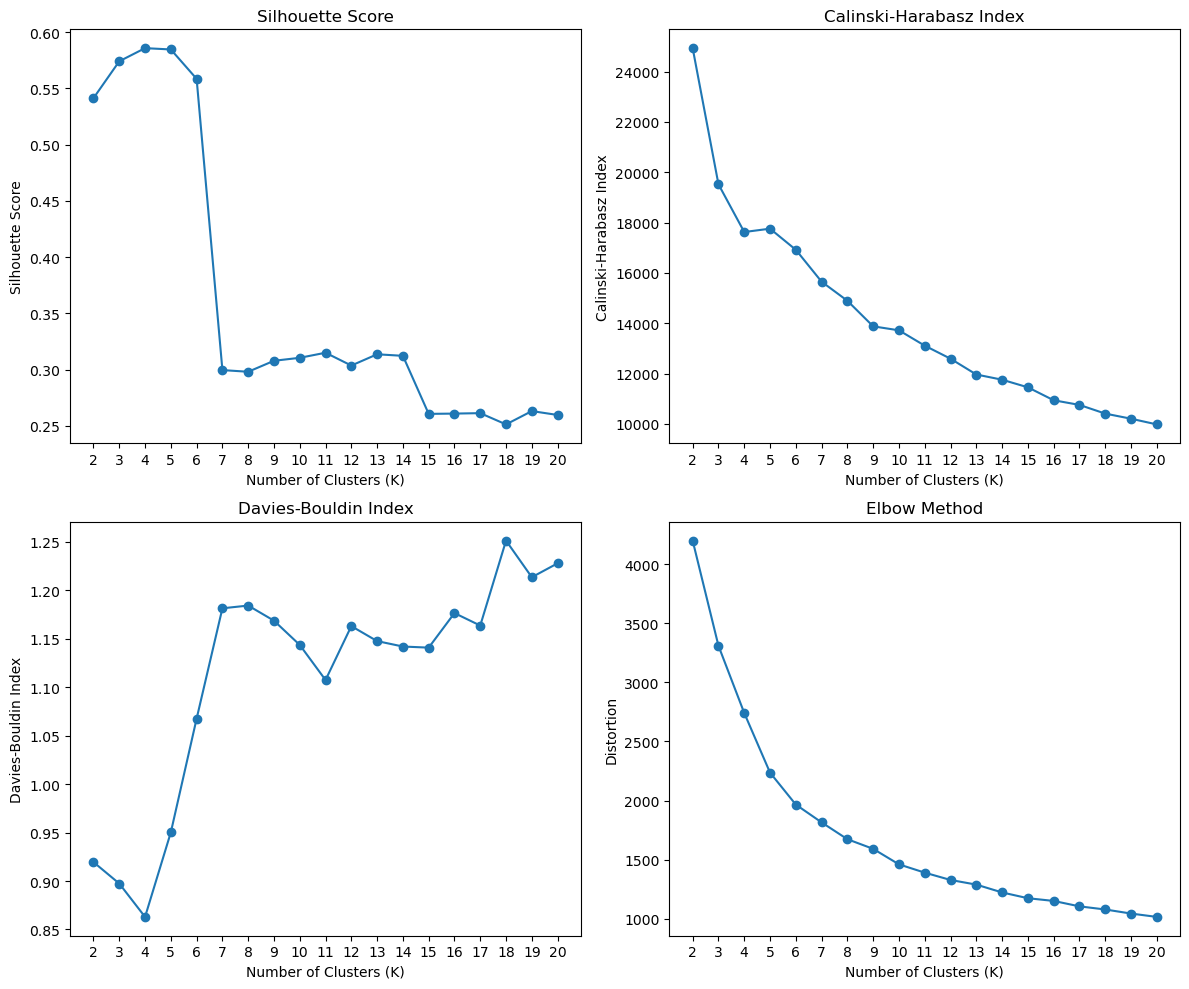

In [32]:
Preprocessing.Evaluate_Clustering_Algorithms(Train_Data[Feature], 20)

In [33]:
import joblib
from sklearn.cluster import KMeans
import pandas as pd
import time
from datetime import timedelta
from tqdm import tqdm, trange



# 創建 KMeans 物件
kmeans = KMeans(n_clusters=6)

# 訓練模型並進行分群
kmeans.fit(Train_Data[Feature])

# 分群結果
labels = kmeans.labels_
   
# 群中心
centers = kmeans.cluster_centers_

Train_Data['Action Element'] = labels
Test_Data['Action Element'] = labels

In [34]:
###########################################################################
# 資料集簡介
#
# 檔案名稱      ： Train_Data
# 資料集描述    :(時)2023年4月17日14時16分開始，(地)學校附近，(車人流量)少
# 總資料筆數     : 5516筆
# 取樣頻率      ： 每秒6次
# 動作元素分群  ： 4群
# 標記狀況      : 2820筆   
#
# 檔案名稱      :Test_Data
# 資料集描述    :(時)2023年4月17日14時16分開始，(地)學校附近，(車人流量)少
# 總資料筆數    :5516筆
# 取樣頻率      :每秒6次
# 動作元素分群  :4群
# 標記狀況     : 1578筆    
# 
###########################################################################

In [35]:
Train_Data = Train_Data[::5]
Test_Data = Test_Data[::5]

In [36]:
# def Train_Vomm(self, TrainData, k):
#     Train the VOMM model with the training data.
#     parameter:
#         - TrainData: Training data, which contains data for different actions and action elements.
#         - k: Number of data groups.
#     output:
#         Returns no value, but creates and saves the trained VOMM model in the object.


Preprocessing.Train_Vomm(Train_Data, 6)

訓練模型所花費時間：0小時0分鐘20秒


In [37]:
# def Test_Vomm(self, TestData, frequency):
#     Test the VOMM model on the test data.
#     parameter:
#         - TestData: Test data, containing the sequence of action elements to test.
#         - frequency: How often the dataset is sampled.
#     output:
#         Returns no value, but saves the prediction to a file.

Preprocessing.Test_Vomm(Test_Data, 6)

預測所花費時間：0小時0分鐘6秒


In [38]:
# def Compute_Accuracy_V2(self, DataSet, frequency):
#     Computes the accuracy of predictions based on the provided dataset and frequency.
#     parameter:
#         self: the object instance.
#         DataSet: A dataset containing action data.
#         Frequency: Dataset sampling frequency.
#     output:
#         return result: DataFrame containing precision results, and save archive to file.


Preprocessing.Compute_Accuracy_V2(Test_Data, 6)

,Time Step,Time Step,Idle,U-turn,Turn Right,Turn Left,Go Straight,Two-Stage Left,Match Percentage
0,Action,Action,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000
1,length_6,length_6,95.954266,28.260870,42.50,25.000000,3.061224,55.339806,77.820025
2,Filter_6,Filter_6,95.866315,48.913043,66.25,23.529412,0.000000,77.669903,81.368821
3,length_12,length_12,93.315743,13.043478,41.25,33.823529,3.061224,62.135922,75.792142
4,Filter_12,Filter_12,93.315743,22.826087,45.00,38.235294,0.000000,79.611650,77.693283
5,length_18,length_18,91.644679,1.086957,40.00,41.176471,3.061224,70.873786,74.714829
6,Filter_18,Filter_18,91.820580,1.086957,53.75,51.470588,0.000000,79.611650,76.362484
7,length_24,length_24,91.380827,0.000000,47.50,41.176471,4.081633,60.194175,74.207858
8,Filter_24,Filter_24,91.380827,0.000000,45.00,50.000000,0.000000,61.165049,74.271229
9,length_30,length_30,88.390501,0.000000,45.00,27.941176,3.061224,56.310680,71.039290
